In [4]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import math
import soundfile as sf
import scipy.signal
# import torch 
import scipy
from scipy import signal

In [119]:
pip install torch torchvision torchaudio

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
N = 32
L = 8
S = 4
M = int(N/S)
print(M)

8


In [3]:
print(ISTFT.shape[1])

NameError: name 'ISTFT' is not defined

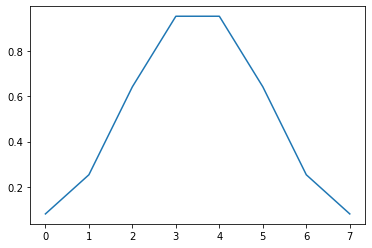

In [4]:
window = np.hamming(L)
plt.plot(window)

32


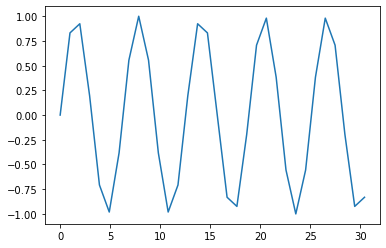

In [5]:
t = np.linspace(0, 10*np.pi,33)[:-1]
sin = np.sin(t)
plt.plot(t,sin)
print(len(sin))

In [85]:
n =12
if (n >= 0) and (n<=7):
    print(n)
else:
    print('X')

X


In [58]:
array_exp = []
for k in range(0, N,1):
    globals()['exp{}'.format(k)] = []
   
    for l in range(0, N,1):

        value = (((2*np.pi)*k*l)/N )*1j
        exp = np.exp(value)
        globals()['exp{}'.format(k)].append(exp)
         
    array_exp.append(globals()['exp{}'.format(k)])
array_exp = np.array(array_exp)
array_exp = array_exp.T
print(array_exp.shape)

(32, 32)


In [93]:

STFT = []
for m in range(1,M+1,1):

    data_list = []
    for l in range(0,N,1):
        
        if ((m*S-l)>= 0) and ((m*S-l) <= (L-1)):
            data = sin[l]*window[m*S-l]
            print('data')
        else:
            print('zero')
            zero_window = 0
            data = sin[l] * zero_window
        

        data_list.append(data)
    
  
    F = data_list @ array_exp
    STFT.append(F)

STFT = np.array(STFT)
print(STFT.shape)

data
data
data
data
data
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
data
data
data
data
data
data
data
data
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
data
data
data
data
data
data
data
data
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
data
data
data
data
data
data
data
data
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
data
data
data
data
data
data
data
data
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
data
data
data
data
data
data
data
data
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero


In [94]:
### make exponential
array_exp_i = []
    
for l in range(0, N,1):
    globals()['exp_i{}'.format(l)] = []
        
    for k in range(0, N,1):
        value = -1j * (((2*np.pi)*k*l)/N)
        exp_i = np.exp(value)
        globals()['exp_i{}'.format(l)].append(exp_i)
            
    array_exp_i.append(globals()['exp_i{}'.format(l)])

array_exp_i = np.array(array_exp_i)    
array_exp_i = array_exp_i.T
    

In [95]:
### matrix calculation
ISTFT = []

for m in range(0, len(STFT),1):
    y = STFT[m] @ array_exp_i
    ISTFT.append(y)

ISTFT = np.array(ISTFT) / N
print(ISTFT)
print(ISTFT.shape)

[[-5.55111512e-17-3.46944695e-18j  7.93592579e-01+7.37257477e-18j
   5.93462914e-01+7.80625564e-18j  4.93958338e-02+3.46944695e-17j
  -5.65685425e-02+8.32667268e-17j -4.85722573e-17+1.31838984e-16j
  -3.90312782e-16-1.59594560e-16j  1.24900090e-16-1.80411242e-16j
   2.42861287e-17+1.21430643e-16j -3.30898503e-16-1.71737624e-16j
  -6.00214323e-16-7.80625564e-17j -9.88792381e-17-5.79397641e-16j
   1.83880688e-16-4.44089210e-16j -2.16840434e-17-1.94289029e-16j
   5.30825384e-16+4.92661467e-16j -4.30211422e-16+5.58580959e-16j
  -2.08166817e-17-3.46944695e-18j  7.21644966e-16+1.00527225e-15j
  -2.22044605e-16+2.41126563e-16j  2.77555756e-17+2.72351586e-16j
  -8.67361738e-17-1.38777878e-17j -8.13585310e-16+3.81639165e-16j
  -7.56339436e-16-1.08940634e-15j -2.74086309e-16-2.08860707e-15j
  -5.44703171e-16-1.09634524e-15j  1.24683250e-15-2.86229374e-16j
   3.15719673e-16-2.49800181e-16j  1.38777878e-17+1.31838984e-16j
  -6.80011603e-16-1.24206201e-15j  2.30197805e-15-5.82867088e-16j
   9.97465

In [96]:
Z = []
up_sum = 0
down_sum = 0

for l in range(0,N,1):
    for m in range(1,M+1,1):
        
        if ((m*S-l)>= 0) and ((m*S-l) <= (L-1)):
            up_data = window[m*S-l] * ISTFT[m-1,l]
            down_data = (window[m*S-l])**2
            zero_window = 0
            up_data = ISTFT[m-1,l] * zero_window
            down_data = zero_window
        else:
            zero_window = 0
            up_data = zero_window
            down_data = zero_window

        up_sum = up_sum + up_data
        down_sum = down_sum + down_data
        
    z = up_sum / down_sum
    Z.append(z)
    
print(len(Z))
        
        
        

32


<ipython-input-96-3372acebb75b>:22: RuntimeWarning: invalid value encountered in cdouble_scalars
  z = up_sum / down_sum


In [25]:
for l in range(0,32,1):
    print(l)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [98]:
Z = []

up_sum = 0

down_array = []
down_sum = 0

for m in range(1, M+1, 1):
    globals()['sqr{}'.format(m)] = []
    
    for l in range(0,N,1):
        
        if ((m*S-l)>= 0) and ((m*S-l) <= (L-1)):
            ISTFT[m-1,l] = ISTFT[m-1,l]*window[m*S-l]
            globals()['sqr{}'.format(m)].append((window[m*S-l])**2)

            
        else:
            zero_window = 0
            ISTFT[m-1,l] = ISTFT[m-1,l]*zero_window
            globals()['sqr{}'.format(m)].append(zero_window)
            
    down_array.append(globals()['sqr{}'.format(m)])  
        
down_array = np.array(down_array)
print(down_array.shape)
print(down_array)


(8, 32)
[[0.91096655 0.91096655 0.41262589 0.06410755 0.0064     0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.0064     0.06410755 0.41262589 0.91096655 0.91096655
  0.41262589 0.06410755 0.0064     0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.0064
  0.06410755 0.41262589 0.91096655 0.91096655 0.41262589 0.06410755
  0.0064     0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.       

In [99]:
### Calculate griffin-lim algorithm
up_sum = 0
down_sum = 0
for i in range(0, M, 1):
    up_sum = up_sum + ISTFT[i]
    down_sum = down_sum + down_array[i]
Result = up_sum / down_sum

C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


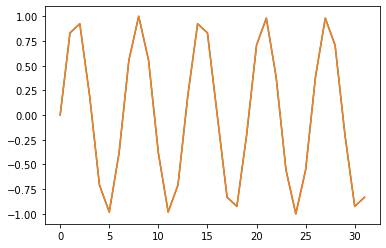

In [102]:
plt.plot(Result)
plt.plot(sin)

In [64]:
def lib_STFT(sig, L, S):

    N = int(len(sig))
    M = int(N/S)
    window = scipy.signal.get_window('hamming',L)
    print(window)
    
    array_exp = []
    for k in range(0, N,1):
        globals()['exp{}'.format(k)] = []
   
        for l in range(0, N,1):

            value = (((2*np.pi)*k*l)/N )*1j
            exp = np.exp(value)
            globals()['exp{}'.format(k)].append(exp)
         
        array_exp.append(globals()['exp{}'.format(k)])
    array_exp = np.array(array_exp)
    array_exp = array_exp.T
    
    
    STFT = []
    for m in range(0,M-1,1):
        print(m)
        data_list = []
        for l in range(0,N,1):
            
            if ((m*S+l) > l) or ((m*S+l) >= S*(m+1)):
                zero_window = 0
                data = zero_window
                    
            else:
                print(l,l-S*m)
                data = sig[l] * window[l-S*m]
                
            data_list.append(data)
           
        data_list = np.array(data_list)
        print(data_list.shape) 
        F = data_list @ array_exp
        STFT.append(F)

    STFT = np.array(STFT)
    
    return STFT


In [6]:
def STFT(sig, L, S):
    window = scipy.signal.get_window('hamming',L)
    N = int(len(sig))
    M = int(N/S)
    array_exp = []
    for k in range(0, N,1):
        globals()['exp{}'.format(k)] = []
   
        for l in range(0, N,1):

            value = (((2*np.pi)*k*l)/N )*1j
            exp = np.exp(value)
            globals()['exp{}'.format(k)].append(exp)
         
        array_exp.append(globals()['exp{}'.format(k)])
    array_exp = np.array(array_exp)
    array_exp = array_exp.T
    
    
    STFT = []
    for m in range(1,M+1,1):

        data_list = []
        for l in range(0,N,1):
        
            if ((m*S-l)>= 0) and ((m*S-l) <= (L-1)):
                data = sig[l]*window[m*S-l]
                
            else:
                zero_window = 0
                data = sig[l] * zero_window
        

            data_list.append(data)
    
  
        F = data_list @ array_exp
        STFT.append(F)

    STFT = np.array(STFT)
    
    return STFT


In [8]:
def GriffinLim(STFT, L, S):
    window = scipy.signal.get_window('hamming',L)
    N = int(STFT.shape[1])
    M = int(N/S)
    
    ### make exponential
    array_exp_i = []
    
    for l in range(0, N,1):
        globals()['exp_i{}'.format(l)] = []
        
        for k in range(0, N,1):
            value = -1j * (((2*np.pi)*k*l)/N)
            exp_i = np.exp(value)
            globals()['exp_i{}'.format(l)].append(exp_i)
                
        array_exp_i.append(globals()['exp_i{}'.format(l)])

    array_exp_i = np.array(array_exp_i)    
    array_exp_i = array_exp_i.T
    
    ### matrix calculation
    ISTFT = []

    for m in range(0, len(STFT),1):
        y = STFT[m] @ array_exp_i
        ISTFT.append(y)

    ISTFT = np.array(ISTFT) / N
    

    down_array = []

    for m in range(1, M+1, 1):
        globals()['sqr{}'.format(m)] = []
    
        for l in range(0,N,1):
        
            if ((m*S-l)>= 0) and ((m*S-l) <= (L-1)):
                ISTFT[m-1,l] = ISTFT[m-1,l]*window[m*S-l]
                globals()['sqr{}'.format(m)].append((window[m*S-l])**2)

            
            else:
                zero_window = 0
                ISTFT[m-1,l] = ISTFT[m-1,l]*zero_window
                globals()['sqr{}'.format(m)].append(zero_window)
                
        down_array.append(globals()['sqr{}'.format(m)])  
        
    down_array = np.array(down_array)

    ### Calculate griffin-lim algorithm
    up_sum = 0
    down_sum = 0
    for i in range(0, M, 1):
        up_sum = up_sum + ISTFT[i]
        down_sum = down_sum + down_array[i]
    Result = up_sum / down_sum
    
    return Result
    

32


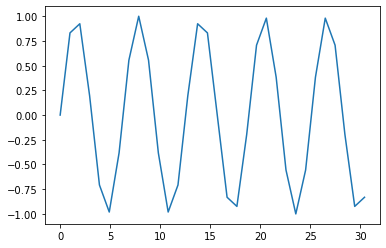

In [9]:
t = np.linspace(0, 10*np.pi,33)[:-1]
sin = np.sin(t)
plt.plot(t,sin)
print(len(sin))

In [10]:
sin_stft = STFT(sin, 8, 4)
sin_istft = GriffinLim(sin_stft,8,4)
m_sin_stft = np.exp(3*1j) * sin_stft
m_sin_griffin = GriffinLim(m_sin_stft,8,4)

In [73]:

print(stft_lib.shape)
print(sin_stft.T[:].shape)
print(scipy_stft.shape)
#plt.plot(m_sin_griffin)

(513, 65)
(32, 8)
(3,)


C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


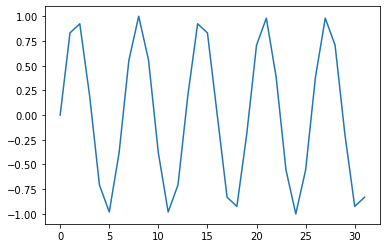

In [69]:
plt.plot(sin_istft)

(17, 9)


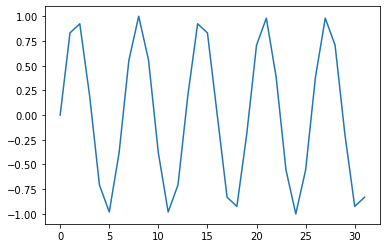

In [11]:
stft_lib = librosa.stft(sin, window='hamming', n_fft=32, hop_length=4, win_length=8)
istft_lib = librosa.istft(stft_lib,window='hamming', hop_length=4, win_length=8)
plt.plot(istft_lib)
print(stft_lib.shape)

In [65]:
sin_stft1 = lib_STFT(sin, 8, 4)
sin_stft1 = (sin_stft1[:,:17]).T
print(sin_stft1.shape)

[0.08       0.21473088 0.54       0.86526912 1.         0.86526912
 0.54       0.21473088]
0
0 0
1 1
2 2
3 3
(32,)
1
(32,)
2
(32,)
3
(32,)
4
(32,)
5
(32,)
6
(32,)
(17, 7)


(17, 8)


C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


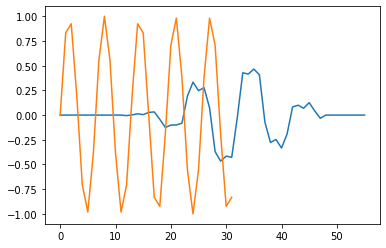

In [54]:
sin_stft = STFT(sin, 8, 4)
sin_stft = sin_stft.T[:17,:]
print(sin_stft.shape)
sin_lib_istft = librosa.istft(sin_stft)
plt.plot(sin_lib_istft)
plt.plot(sin_istft)

(17, 7)
(17, 9)


C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


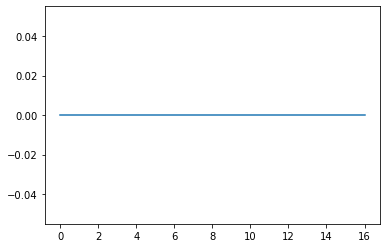

In [68]:
plt.plot(sin_stft1[:,5])
print(sin_stft1.shape)
#plt.plot(sin_stft[:,0])
#plt.plot(stft_lib[:,4])
print(stft_lib.shape)


(17, 9)


C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


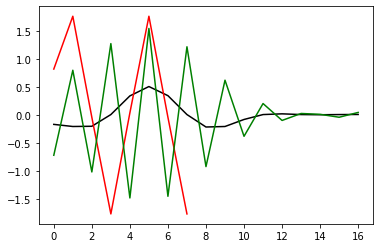

In [35]:
scipy_stft = scipy.signal.stft(sin, nfft=32, window='hamming',noverlap=4,nperseg=8)
print(scipy_stft[2].shape)
plt.plot(scipy_stft[2][:,3],c='black')
plt.plot(sin_stft[:,3],c='red')
plt.plot(stft_lib[:,3],c='green')